# Initialisation

Declaration of the experiment files

In [ ]:
#The usual suspects
import matplotlib.pyplot as plt #To make figure
plt.rcParams.update({'font.size':12})#To make figure readable
import numpy as np #For everything
from pickle import load as pload
from tqdm import tqdm #For nice loading bars
#And our own files
from Reseau import Reseau

FOLDER = "./"

experiments = {
    name:
    {
        "output_dir":f"{FOLDER}{cond}/"
    }
    for cond,name in [
        ("M2","M2WT_200610"),
        ("M2","M2WT_200616"),
        ("M2","M2WT_200617"),
        ("M2","M2WT_210304"),
        ("M2","M2WT_210908"),
        ("M2","M2WT_210909"),
        ("M0","M0WT_200615"),
        ("M0","M0WT_200623"),
        ("M0","M0WT_200629"),
        ("KCl","KCl_210111"),
        ("KCl","KCl_210114"),
        ("KCl","KCl_210115"),
        ("T19","T19_210127"),
        ("T19","T19_210128"),
        ("T19","T19_210204"),
        ("T35","T35_220127"),
        ("T35","T35_220309"),
        ("LED","LED_201130"),
        ("LED","LED_201201")
        ]
}

def load(name:str)->Reseau:
    """
    Loads the data from the selected experiment into a Reseau object
    """
    params = experiments[name]
    pathToFile = params["output_dir"]+name+"_ready.gpickle"
    with open(pathToFile,"rb") as f:
        reseau = pload(f)
    return reseau

M2s:list[Reseau] = [load(name)
                    for name in ("M2WT_200610","M2WT_200616","M2WT_200617",
                                 "M2WT_210304","M2WT_210908","M2WT_210909")]
M0s:list[Reseau] = [load(name)
                    for name in ("M0WT_200615","M0WT_200623","M0WT_200629")]
KCls:list[Reseau] = [load(name) 
                     for name in ("KCl_210111","KCl_210114","KCl_210115")]
T19s:list[Reseau] = [load(name)
                     for name in ("T19_210127","T19_210128","T19_210204")]
T35s:list[Reseau] = [load(name)
                     for name in ("T35_220127","T35_220309")]
LEDs:list[Reseau] = [load(name)
                     for name in ("LED_201130","LED_201201")]

conditions = {"M2":M2s,
              "M0":M0s,
              "KCl":KCls,
              "LED":LEDs,
              "T19":T19s,
              "T35":T35s}

def set_nature_branches(reseau:Reseau,Deltat_AL:float = 5)->None:
    """
    Updates the nature of the branchings according to the delay before the appearance of the branch 
    (see article *Full Identification of a Growing and Branching Network Spatio-Temporal Structures*)
    
    """
    for b in reseau.branches:
        nature = "Apical" if b.get_tstart()-b.t[0]<=Deltat_AL else "Lateral"
        b.nature = nature
    return None

for condition,reseaux in conditions.items():
    for r in reseaux:
        set_nature_branches(r,Deltat_AL=5)

frame2h:float = 18/60 #1 frame = 18 min = 18/60 h
pixel2mum:float = 1.6 #1 px = 1.6 micrometer
dt = 0.1*frame2h#temporal uncertainty

colors:dict = {"M2":"blue","M0":"orange","KCl":"red","T19":"green","T35":"purple","LED":"steelblue"}
xcond:dict = {"M2":0,"M0":1,"KCl":2,"LED":3,"T19":4,"T35":5}
linestyles = {"M2":'solid',"M0":'solid',"KCl":'solid',"T19":'solid',"T35":'solid'}

def global_measures(r:Reseau)->np.ndarray:
    """  
    Returns the number of apical and lateral branches, the number of apexes and the total length over time
    """
    data = []
    t_start_api = np.array([b.get_tstart() 
                            for b in r.branches 
                            if b.nature=="Apical"])
    t_start_lat = np.array([b.get_tstart() 
                            for b in r.branches 
                            if b.nature=="Lateral"])
    t_start_end_branches = np.array([[b.get_tstart(),b.get_tend()]
                                     for b in r.branches])
    for t in range(r.start,r.end+1):
        data.append(
            [
                t,
                np.sum(t_start_api<=t),
                np.sum(t_start_lat<=t),
                np.sum(np.logical_and(t_start_end_branches[:,0]<=t,
                                      t_start_end_branches[:,1]>=t))            
            ]
        )
    data = np.array(data)
    data = np.column_stack((data,r.total_length))
    return data

data_global = {}
for condition,reseaux in conditions.items():
    for r in reseaux:
        data_global[r.name] = global_measures(r)


Loading infered numerical values to compare

In [5]:
#format "condition":(value,uncertainty)
b1s_hat = {"M2":(3.31e-3,0.38e-3),"M0":(4.25e-3,0.38e-3),"KCl":(4.06e-3,0.5e-3),"LED":(1.31e-3,1.81e-3),"T19":(0.31e-3,0.94e-3),"T35":(5.06e-3,0.88e-3)}
b2s_hat = {"M2":(7.03e-6,2.34e-6),"M0":(4.30e-6,2.34e-6),"KCl":(5.08e-6,3.13e-6),"LED":(110e-6,33e-6),"T19":(43e-6,11e-6),"T35":(10.93e-6,8.98e-6)}
lambdas_hat = {"M2":(4.75e-3,0.13e-3),"M0":(5.06e-3,0.13e-3),"KCl":(4.69e-3,0.19e-3),"LED":(11e-3,0.81e-3),"T19":(6.9e-3,0.49e-3),"T35":(6.88e-3,0.44e-3)}


# $\lambda_{obs}$

M2WT_200610 0.3699759118388396 0.006214022746183707
M2WT_200616 0.4253507714627392 0.008603307761250558
M2WT_200617 0.4611060746109085 0.0076926737801265915
M2WT_210304 0.4008555179208664 0.005932061468014267
M2WT_210908 0.3155090063699965 0.004830138873560814
M2WT_210909 0.3525322556894524 0.005847038108593595
M2 (0.3875549229821338, 0.04785642912497945)
M0WT_200615 0.32949720168851887 0.006520376010248359
M0WT_200623 0.2783525301544516 0.0058226532218025
M0WT_200629 0.3233717087927535 0.008494141669488024
M0 (0.3104071468785747, 0.02280357071165011)
KCl_210111 0.24509295702974895 0.0024510101389235575
KCl_210114 0.2836490448707809 0.004975766550990616
KCl_210115 0.3039524787472207 0.007282803323280692
KCl (0.2775648268825835, 0.024411392225739063)
LED_201130 0.23052357882726868 0.003043426743148955
LED_201201 0.20250501539376212 0.002733520298698661
LED (0.2165142971105154, 0.01400928171675328)
T19_210127 0.27186467074434495 0.006798517736849066
T19_210128 0.23498102975782878 0.00529

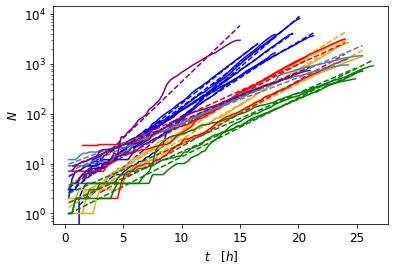

In [6]:
lambdas_obs = {}
fig,ax = plt.subplots()
for condition,reseaux in conditions.items():
    lambda_obs_condition = []
    dlambda_obs_condition = []
    print("="*80)
    for reseau in reseaux:
        times = np.arange(reseau.start,reseau.end+1)
        Nnoeuds = np.array([sum(d==3 for n,d in reseau.network_at(t).degree()) for t in times])
        times = times*frame2h
        ax.plot(times,Nnoeuds,color=colors[condition])
        f = np.where(Nnoeuds>0)
        Y = np.log(Nnoeuds[f])
        X = times[f]
        lam_obs = (np.mean(X*Y)-np.mean(X)*np.mean(Y))/(np.mean(X*X)-np.mean(X)*np.mean(X))
        lambda_obs_condition.append(lam_obs)
        dY = np.sqrt(Nnoeuds[f])/Nnoeuds[f]
        dX = dt
        Xmean = np.mean(X)
        Ymean = np.mean(Y)
        varX = np.mean(X*X)-Xmean*Xmean
        covarXY = np.mean(X*Y)-Xmean*Ymean
        N = len(X)
        dlambda_obs  = np.sum(dY*dY*(X-Xmean)*(X-Xmean))/(N*N*varX*varX)
        dlambda_obs += np.sum(dX*dX*((Y-Ymean)*varX-2*(X-Xmean)*covarXY)**2)/(N*N*varX**4)# to be computed using Poissonian uncertainty for N.
        dlambda_obs = np.sqrt(dlambda_obs)
        Y0 = np.mean(Y)-np.mean(X)*lam_obs
        ax.plot(X,np.exp(Y0+lam_obs*X),ls='dashed',color=colors[condition])
        dlambda_obs_condition.append(dlambda_obs)
        print(reseau.name,lam_obs,dlambda_obs)
    Nreseaux = len(reseaux)
    dlambda_obs_condition = np.array(dlambda_obs_condition)
    lambdas_obs[condition] = (np.mean(lambda_obs_condition),max(np.std(lambda_obs_condition),np.sqrt(np.sum(dlambda_obs_condition*dlambda_obs_condition))/Nreseaux))#np.std(lambda_obs_condition))
    print(condition,lambdas_obs[condition])
ax.set_yscale('log')
ax.set_xlabel("$t \quad [h]$")
ax.set_ylabel("$N$")
plt.show()
plt.close()


# Measures of $b_1$, $b_2$ and $v$

In [7]:
def propCoeff_LSE_estimation(X:np.ndarray,Y:np.ndarray,dX:np.ndarray,dY:np.ndarray)->tuple[float]:
    """ 
    Returns the estimation of the proportionality coefficient between X and Y and the R2 value, via Least Square Error method.
    """
    Sxx = np.sum(X*X)
    Sxy = np.sum(X*Y)
    alpha = Sxy/Sxx
    error_x = np.sum((Y-2*X*alpha)**2*dX**2)/(Sxx*Sxx)
    error_y = np.sum((X*dY)**2)/(Sxx*Sxx)
    dalpha = np.sqrt(error_x+error_y)
    R2 = 1 - np.sum((Y-alpha*X)**2)/np.sum((Y-np.mean(Y))**2)
    return alpha,dalpha,R2



In [8]:
b1s_exp = {}
b2s_exp = {}
vs_exp = {}

for condition,reseaux in conditions.items():

    vitesses = []
    b1_cond = []
    b2_cond = []
    for r in reseaux:
        data = data_global[r.name][:-1,:] #in the form of t,Na,Nl,A,L
        #b1
        x = data[1:,3]
        y = (data[1:,1]-data[:-1,1])/frame2h
        f = np.where(x!=0)
        dx = np.sqrt(x[f])
        dy = np.sqrt(data[1:,1]+data[:-1,1]+y*y*dt*dt)/frame2h
        dy = dy[f]
        b1,db1,R2_b1 = propCoeff_LSE_estimation(x[f],y[f],dx,dy)
        b1_cond.append([b1,db1])
        #b2
        x = data[1:,4]*pixel2mum
        y = (data[1:,2]-data[:-1,2])/frame2h
        f = np.where(x!=0)
        dx = np.sqrt(x[f])
        dy = np.sqrt(data[1:,2]+data[:-1,2]+y*y*dt*dt)/frame2h
        dy = dy[f]
        b2,db2,R2_b2 = propCoeff_LSE_estimation(x[f],y[f],dx,dy)
        b2_cond.append([b2,db2])
        #Speeds
        x = (data[1:,3]+data[:-1,3])/2
        y = (data[1:,4]-data[:-1,4])*pixel2mum/frame2h
        f = np.where(x!=0)
        dx = np.sqrt(data[1:,3]+data[:-1,3])/2
        dy = np.sqrt(data[1:,4]*pixel2mum+data[:-1,4]*pixel2mum+y*y*dt*dt)/frame2h
        dy = dy[f]
        v,dv,R2_v = propCoeff_LSE_estimation(x[f],y[f],dx,dy)
        vitesses.append([v,dv,R2_v])

    Nreseaux = len(reseaux)
    b1_cond = np.array(b1_cond)
    b2_cond = np.array(b2_cond)
    vitesses = np.array(vitesses)
    b1s_exp[condition] = (np.mean(b1_cond[:,0]),max(np.std(b1_cond[:,0]),np.sqrt(np.sum(b1_cond[:,1]**2))/Nreseaux))
    b2s_exp[condition] = (np.mean(b2_cond[:,0]),max(np.std(b2_cond[:,0]),np.sqrt(np.sum(b2_cond[:,1]**2))/Nreseaux))
    vs_exp[condition] = (np.mean(vitesses[:,0]),max(np.std(vitesses[:,0]),np.sqrt(np.sum(vitesses[:,1]**2))/Nreseaux))
    
    print("="*80)
    print(condition)
    b1,db1 = b1s_exp[condition]
    b2,db2 = b2s_exp[condition]
    v,dv = vs_exp[condition]
    print(f"v : {v:.0f}+/-{dv:.0f}")
    print(f"b1 : {b1:.2f}+/-{db1:.2f}")
    print(f"b2x10**4 : {b2*10**4:.2f}+/-{db2*10**4:.2f}")


M2
v : 121+/-11
b1 : 0.28+/-0.05
b2x10**4 : 6.88+/-1.92
M0
v : 102+/-2
b1 : 0.25+/-0.04
b2x10**4 : 3.45+/-0.80
KCl
v : 97+/-11
b1 : 0.19+/-0.03
b2x10**4 : 6.02+/-0.83
LED
v : 34+/-1
b1 : 0.09+/-0.04
b2x10**4 : 9.55+/-2.38
T19
v : 72+/-16
b1 : 0.13+/-0.04
b2x10**4 : 4.49+/-1.05
T35
v : 68+/-6
b1 : 0.20+/-0.07
b2x10**4 : 8.24+/-2.83


# Comparison

In [9]:
b1s_infered = {}
b2s_infered = {}
vs_infered = {}
for condition in conditions.keys():
    lam_obs,dlam_obs = lambdas_obs[condition]
    lam_hat,dlam_hat = lambdas_hat[condition]
    b1_hat,db1_hat = b1s_hat[condition]
    b2_hat,db2_hat = b2s_hat[condition]
    v = lam_obs/lam_hat
    dv = v*np.sqrt(dlam_obs**2/(lam_obs**2)+dlam_hat**2/(lam_hat**2))
    b1 = b1_hat*v 
    db1 = b1*np.sqrt(db1_hat**2/(b1_hat**2)+dv**2/(v**2))
    b2 = b2_hat*v
    db2 = b2*np.sqrt(db2_hat**2/(b2_hat**2)+dv**2/(v**2))
    b1s_infered[condition] = (b1,db1)
    b2s_infered[condition] = (b2,db2)
    vs_infered[condition] = (v,dv)
    print(condition)
    print(f"${lam_obs:.2f} \pm {dlam_obs:.2f}$ & ${v:.0f} \pm {dv:.0f}$ & ${b1:.2f} \pm {db1:.2f}$ & ${b2*1e4:.0f} \pm {db2*1e4:.0f}$")


M2
$0.39 \pm 0.05$ & $82 \pm 10$ & $0.27 \pm 0.05$ & $6 \pm 2$
M0
$0.31 \pm 0.02$ & $61 \pm 5$ & $0.26 \pm 0.03$ & $3 \pm 1$
KCl
$0.28 \pm 0.02$ & $59 \pm 6$ & $0.24 \pm 0.04$ & $3 \pm 2$
LED
$0.22 \pm 0.01$ & $20 \pm 2$ & $0.03 \pm 0.04$ & $22 \pm 7$
T19
$0.25 \pm 0.02$ & $36 \pm 3$ & $0.01 \pm 0.03$ & $16 \pm 4$
T35
$0.37 \pm 0.15$ & $54 \pm 22$ & $0.27 \pm 0.12$ & $6 \pm 5$


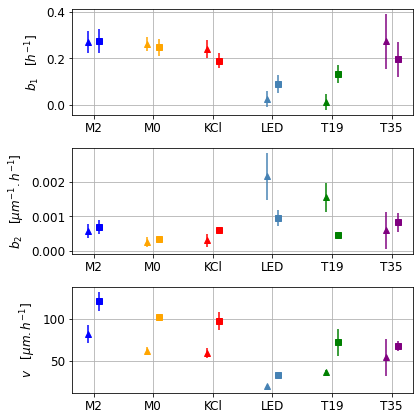

In [10]:
fig,axes = plt.subplots(figsize=(6,6),nrows=3,
                        layout='tight')
offset = .1
for condition,reseaux in conditions.items():
    icond = xcond[condition]
    color = colors[condition]
    style = "solid"
    #b1
    ax = axes[0]
    b1,db1 = b1s_infered[condition]
    ax.errorbar(icond-offset,b1,yerr=db1,color=color,marker="^")
    b1,db1 = b1s_exp[condition]
    ax.errorbar(icond+offset,b1,yerr=db1,color=color,marker="s")
    #b2
    ax = axes[1]
    b2,db2 = b2s_infered[condition]
    ax.errorbar(icond-offset,b2,yerr=db2,color=color,marker="^")
    b2,db2 = b2s_exp[condition]
    ax.errorbar(icond+offset,b2,yerr=db2,color=color,marker="s")
    #v
    ax = axes[2]
    v,dv = vs_infered[condition]
    ax.errorbar(icond-offset,v,yerr=dv,color=color,marker="^")
    v,dv = vs_exp[condition]
    ax.errorbar(icond+offset,v,yerr=dv,color=color,marker="s")
ax = axes[0]
ax.grid()
ax.set_xticks([xcond[condition] for condition in conditions.keys()],list(conditions.keys()))
ax.set_ylabel("$b_1\quad[h^{-1}]$")
ax = axes[1]
ax.grid()
ax.set_xticks([xcond[condition] for condition in conditions.keys()],list(conditions.keys()))
ax.set_ylabel("$b_2\quad[\mu m^{-1}.h^{-1}]$")
ax = axes[2]
ax.grid()
ax.set_xticks([xcond[condition] for condition in conditions.keys()],list(conditions.keys()))
ax.set_ylabel("$v\quad[\mu m.h^{-1}]$")
plt.show()
plt.close()